In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyodbc
for driver in pyodbc.drivers():
    print(driver)

SQL Server
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server
Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)


In [7]:
con = pyodbc.connect("Driver={SQL Server};Server=AMUTHA;Database=AdventureWorks2022;")
data = pd.read_sql_query('select * from size_revenue', con,index_col=None)
data

C:\Users\rajav\AppData\Local\Temp\ipykernel_20612\3344155980.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('select * from size_revenue', con,index_col=None)


,Name,Size,NumberEmployees,AnnualRevenue
0,Next-Door Bike Store,21000,13,80000.0
1,Professional Sales and Service,18000,14,80000.0
2,Riders Company,21000,15,80000.0
3,The Bike Mechanics,18000,16,80000.0
4,Nationwide Supply,21000,17,80000.0
...,...,...,...,...
696,Retreat Inn,7000,8,30000.0
697,Technical Parts Manufacturing,7000,5,30000.0
698,Totes & Baskets Company,6000,2,30000.0
699,World of Bikes,19000,17,80000.0


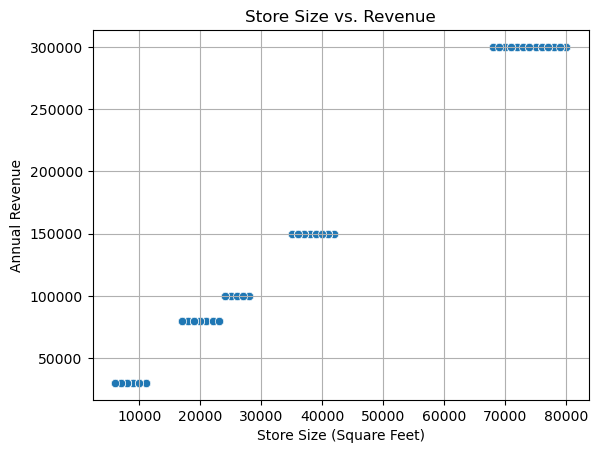

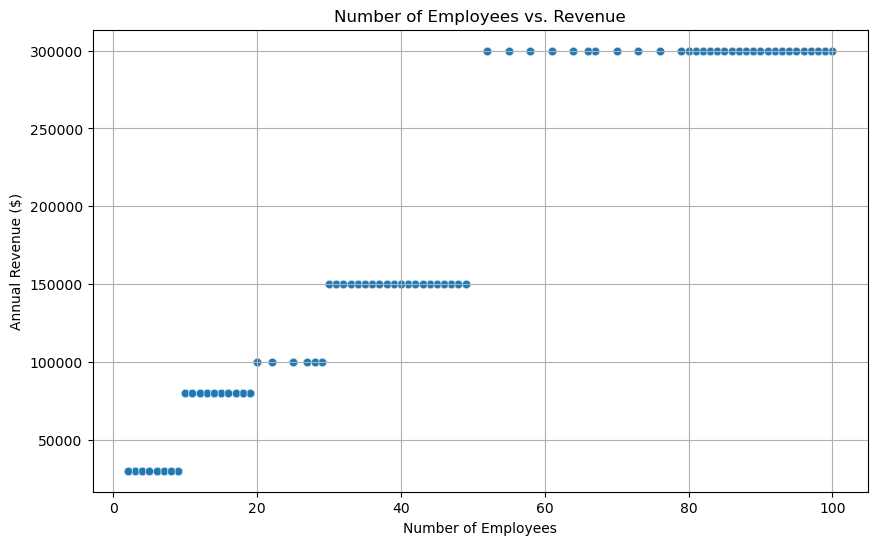

In [12]:
sns.scatterplot(x='Size', y='AnnualRevenue', data=data)
plt.title('Store Size vs. Revenue')
plt.xlabel('Store Size (Square Feet)')
plt.ylabel('Annual Revenue')
plt.grid(True)
plt.show()

# Scatter plot for Number of Employees vs. Revenue without the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumberEmployees', y='AnnualRevenue', data=data, alpha=0.5)  # Alpha for transparency
plt.title('Number of Employees vs. Revenue')  # Adding a title
plt.xlabel('Number of Employees')  # X-axis Label
plt.ylabel('Annual Revenue ($)')  # Y-axis Label, including units
plt.grid(True)  # Adds a grid for easier interpretation
plt.show()


In [13]:
unique_store_names = data['Name'].nunique()

# Print the result
print(f"There are {unique_store_names} unique store names in the dataset.")

# Sort data by 'AnnualRevenue' and select the top 10
top10_stores = data.sort_values(by='AnnualRevenue', ascending=False).head(10)

# Selecting and renaming columns for clearer output
top10_stores = top10_stores[['Name', 'Size', 'NumberEmployees', 'AnnualRevenue']]

# Print the top 10 stores
print(top10_stores)


There are 699 unique store names in the dataset.
                         Name   Size  NumberEmployees  AnnualRevenue
247   Outdoor Equipment Store  76000               89       300000.0
617               Getaway Inn  75000               80       300000.0
623  Racing Sales and Service  77000               86       300000.0
180            Westside Plaza  74000               83       300000.0
181        Ultimate Bike Shop  78000               84       300000.0
182        Outstanding Cycles  78000               85       300000.0
183     Vigorous Sports Store  73000               82       300000.0
184        Sports Merchandise  73000               83       300000.0
185         Fitness Toy Store  75000               84       300000.0
622         Top Sports Supply  78000               85       300000.0


In [11]:
# Sort the data by 'AnnualRevenue' in ascending order to find the lowest
print(f"There are {unique_store_names} unique store names in the dataset.")

top10_lowest = data.sort_values(by='AnnualRevenue', ascending=True).head(10)

# Print the top 10 lowest performing stores
top10_lowest = top10_stores[['Name', 'Size', 'NumberEmployees', 'AnnualRevenue']]

print(top10_lowest)

There are 699 unique store names in the dataset.


KeyError: "['NumberEmployee'] not in index"